<a href="https://colab.research.google.com/github/UsmanSharif001/SpotifyUnsupervised/blob/main/SpotifySongClustering_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA #Hvilken feature betyder mest for grupperingen

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [7]:
df = pd.read_csv("data.csv")
print(df.head())

   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH      

In [10]:
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
# python list comprehension
missing_features = [f for f in features if f not in df.columns]

if missing_features:
  raise ValueError(f"these are missing: {missing_features}")

In [13]:
#Data der skal bruges - brug af scale gør at dataen bliver komprimeret så den store forskel i datasættet ikke svinger for meget ud og får for meget betydning
X = df[features].dropna().values

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled) # Gør den finder bedste lokation for krydset (det røde) hver sang får nu et tal

In [18]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

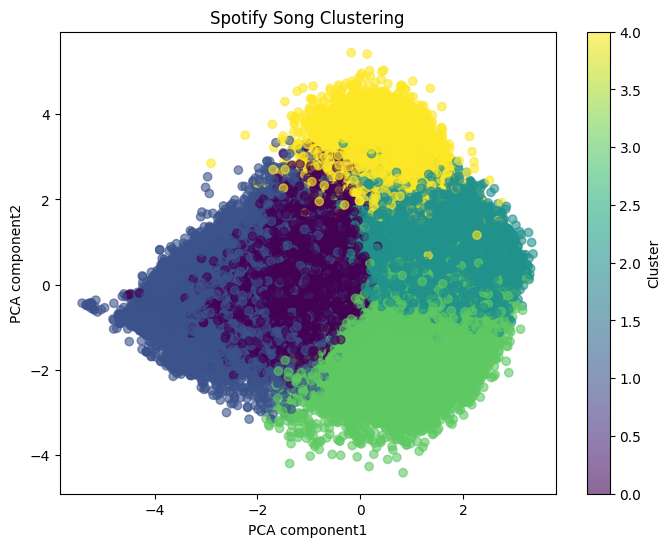

In [24]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('PCA component1')
plt.ylabel('PCA component2')
plt.title('Spotify Song Clustering')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [26]:
df_clustered = df.dropna(subset=features).copy()
df_clustered['cluster'] = clusters

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


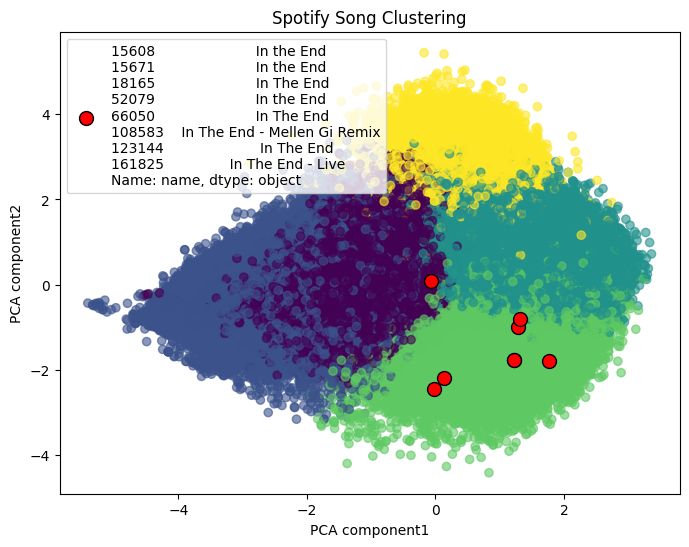

In [34]:
df_clustered['pca1'] = X_pca[:,0]
df_clustered['pca2'] = X_pca[:,1]
song = df_clustered[df_clustered['name'].str.match("In The End", case=False, na=False)].iloc[:] #Adder sangen og viser listen.
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(song['pca1'], song['pca2'], color='red', label=song['name'], edgecolors='black', s=100)
plt.xlabel('PCA component1')
plt.ylabel('PCA component2')
plt.title('Spotify Song Clustering')
plt.legend()
plt.show()

In [28]:
song

,12668
valence,0.292
year,1985
acousticness,0.189
artists,['U.S.A. For Africa']
danceability,0.528
duration_ms,427333
energy,0.447
explicit,0
id,3Z2tPWiNiIpg8UMMoowHIk
instrumentalness,0.0
